In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(5)

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes.' .format(name=fn,
                                                                         length=len(uploaded[fn])))

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv
User uploaded file "pima-indians-diabetes.csv" with length 24045 bytes.


In [0]:
!ls

pima-indians-diabetes.csv  sample_data


In [0]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=',')

# 데이터 셋 설정하기

In [0]:
x_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]
x_test = dataset[700: , 0:8]
y_test = dataset[700: , 8]

In [0]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

# 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 학습과정 설정하기

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# 모델 학습시키기

In [0]:
hist = model.fit(x_train, y_train, epochs = 1000, batch_size = 64)


Epoch 1/1000
700/700 [==============================] - 5s 7ms/step - loss: 4.3551 - acc: 0.6543
Epoch 2/1000
700/700 [==============================] - 0s 74us/step - loss: 3.6567 - acc: 0.6414
Epoch 3/1000
700/700 [==============================] - 0s 79us/step - loss: 3.4546 - acc: 0.6071
Epoch 4/1000
700/700 [==============================] - 0s 82us/step - loss: 3.0942 - acc: 0.6314
Epoch 5/1000
700/700 [==============================] - 0s 82us/step - loss: 2.6298 - acc: 0.6614
Epoch 6/1000
700/700 [==============================] - 0s 81us/step - loss: 2.1287 - acc: 0.6571
Epoch 7/1000
700/700 [==============================] - 0s 76us/step - loss: 1.6758 - acc: 0.6314
Epoch 8/1000
700/700 [==============================] - 0s 72us/step - loss: 1.4128 - acc: 0.5871
Epoch 9/1000
700/700 [==============================] - 0s 78us/step - loss: 1.2093 - acc: 0.6271
Epoch 10/1000
700/700 [==============================] - 0s 82us/step - loss: 1.1190 - acc: 0.6429
Epoch 11/1000
700/7

# 모델 평가하기

In [0]:
scores = model.evaluate(x_test, y_test)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 225us/step
acc : 75.00%


In [0]:
model.metrics_names

['loss', 'acc']

In [0]:
scores

[0.5607727380359874, 0.75]

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs'), Text(0.5, 1.0, 'model loss')]

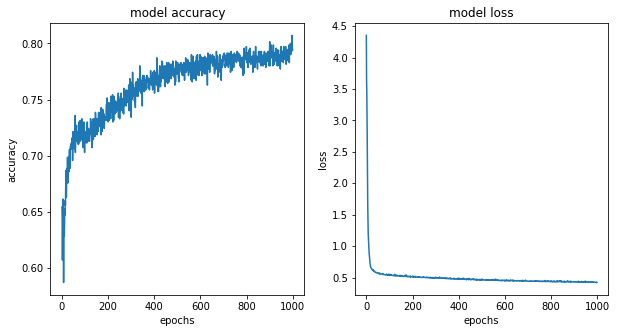

In [0]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey=False, figsize=(10,5))

# 모델의 정확도
ax0.plot(hist.history['acc'])
ax0.set(title = 'model accuracy', xlabel = 'epochs', ylabel='accuracy')

# 모델의 오차
ax1.plot(hist.history['loss'])
ax1.set(title = 'model loss', xlabel = 'epochs', ylabel='loss')

In [0]:
patient = np.array([[0,137,90,35,168,43.1,2.228,33]])

# 모델 예측하기
prediction = model.predict(patient)
print(prediction)

[[0.43728903]]
